# Принятие решений в бизнесе

**Описание проекта:**  
Я - аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.

**Цель:**  
На основании анализа результатов A/B-теста порекомендовать пути увеличения выручки компании.

**Основные задачи:**  
1. Приоритизировать гипотезы;
2. Запустить A/B-тест и проанализировать результаты.

**Этапы работы:**
1. Приоритизация гипотез;
2. Анализ A/B-теста и принятие решения по его результатам.

## 1. Приоритизация гипотез

**Пути к файлам:**  
- `/datasets/hypothesis.csv`
- `/datasets/orders.csv`
- `/datasets/visitors.csv`

**Описание данных:**  
*Таблица `hypothesis` (данные по гипотезам для приоритезации)*:  
* `Hypothesis` - краткое описание гипотезы;
* `Reach` - охват пользователей по 10-балльной шкале;
* `Impact` - влияние на пользователей по 10-балльной шкале;
* `Confidence` - уверенность в гипотезе по 10-балльной шкале;
* `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение Efforts, тем дороже проверка гипотезы).
    
*Таблица `orders` (данные по заказам для A/B-теста)*:
* `transactionId` - идентификатор заказа;
* `visitorId` - идентификатор пользователя, совершившего заказ;
* `date` - дата, когда был совершён заказ;
* `revenue` - выручка заказа;
* `group` - группа A/B-теста, в которую попал заказ.

*Таблица `visitors` (данные по кол-ву пользователей в указанную дату для A/B-теста)*:
* `date` - дата;
* `group` - группа A/B-теста;
* `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста.

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Загрузим библиотеки:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings

Откроем таблицу `hypothesis`:

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv(r'C:\Users\sidya\Docs\Jupiter\Datasets\hypothesis.csv')

Отобразим полное название гипотез и приведем название колонок к нижнему регистру:

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1.1. Применение фреймворка `ICE`

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


*Как мы видим из отсортированной по `ICE` таблице наиболее перспективные гипотезы в порядке убывания:*  
* *Запустить акцию, дающую скидку на товар в день рождения;*   
* *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;*  
* *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.*

### 1.2. Применение фреймворка `RICE`

In [6]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])
                      / hypothesis['efforts'])
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*После применения фреймворка `RICE` очередность кардинально изменилась, теперь следующие гипотезы на первых трех местах:*  
* *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;*   
* *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;*  
* *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.*  

*Видимо, охват пользователей значительно повлиял на результат.*

### 1.3. Как изменилась приоритизация гипотез при применении` RICE` вместо `ICE`?

* Отличительная особенность фреймворка `RICE` от `ICE` в том, что в формулу расчета `ICE` не входит параметр охвата `reach` (масштаб пользователей, которых затронет изменение).  
Из-за самого высокого показателя `reach` из гипотез у гипотезы `"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"`(10 баллов из 10) в отличие от гипотезы `"запустить акцию, дающую скидку на товар в день рождения"` (1 балл из 10) смещение произошло в ее сторону. Это логично, так как масшаб ее применения значительно выше.  
* Гипотеза `"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"` перешла со второго места на третье. Гипотеза `"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"` наоборот поднялась в списке на второе место.

## 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `orders.csv` и `visitors.csv`.
Теперь необходимо их проанализировать.

**Начнем с таблицы `orders`:**

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv(r'C:\Users\sidya\Docs\Jupiter\Datasets\orders.csv')

Создадим функцию для удобства применения и выведем ее результат:

In [8]:
def start(data):
    print(data.info())
    display(data.head())
    print(f'Размер датасета составляет: {data.shape}')
    display(pd.DataFrame(data.isna().mean(), columns=['NaNs']).style.format('{:.2%}'))

In [9]:
start(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Размер датасета составляет: (1197, 5)


,NaNs
transactionId,0.00%
visitorId,0.00%
date,0.00%
revenue,0.00%
group,0.00%


*Датафрейм не содержит пропусков, однако формат времени требует обработки.*

Преобразуем тип значений в колонке "date" и заменим названия некоторых столбцов:

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим датафрейм на наличие дубликатов:

In [11]:
print('Количество полных дубликатов:', orders.duplicated().sum())

Количество полных дубликатов: 0


А также покупки и пользователей на уникальность:

In [12]:
print('Количество уникальных покупок:', orders['transaction_id'].nunique())
print('Количество пользователей:', orders['visitor_id'].nunique())

Количество уникальных покупок: 1197
Количество пользователей: 1031


*Все покупки уникальны, некоторые пользователи совершили несколько покупок.*

А какова ситуация по группам?

In [13]:
print('Количество заказов в группе A:', len(orders[orders['group'] == 'A']))
print('Количество заказов в группе В:', len(orders[orders['group'] == 'B']))

Количество заказов в группе A: 557
Количество заказов в группе В: 640


In [14]:
print('Количество уникальных пользователей в группе A:', orders.query('group == "A"')['visitor_id'].nunique())
print('Количество уникальных пользователей в группе В:', orders.query('group == "B"')['visitor_id'].nunique())

Количество уникальных пользователей в группе A: 503
Количество уникальных пользователей в группе В: 586


*Выборки не равны.*

Создадим цикл для формирования списка пересекающихся пользователей, которые есть как в группе `А`, так и `B`:

In [15]:
double_visitor_id = []

for x in orders.query('group == "A"')['visitor_id'].unique():
    if x in orders.query('group == "B"')['visitor_id'].unique():
        double_visitor_id.append(x)

print('Количество пересекающихся пользователей:', len(double_visitor_id))
print('Доля пересекающихся пользователей: {:.2%}'
      .format(len(double_visitor_id) / orders['visitor_id'].nunique()))

Количество пересекающихся пользователей: 58
Доля пересекающихся пользователей: 5.63%


**Теперь рассмотрим таблицу `visitors`:**

In [16]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv(r'C:\Users\sidya\Docs\Jupiter\Datasets\visitors.csv')

In [17]:
start(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Размер датасета составляет: (62, 3)


,NaNs
date,0.00%
group,0.00%
visitors,0.00%


Приведем колонку "date" к правильному виду:

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим наличие дубликатов:

In [19]:
print('Количество полных дубликатов:', visitors.duplicated().sum())

Количество полных дубликатов: 0


И группы в сравнении друг с другом:

In [20]:
print('Количество дней в группе A:', len(visitors[visitors['group'] == 'A']))
print('Количество дней в группе В:', len(visitors[visitors['group'] == 'B']))

Количество дней в группе A: 31
Количество дней в группе В: 31


In [21]:
print('Количество пользователей в группе A:', visitors.query('group == "A"')['visitors'].sum())
print('Количество пользователей в группе В:', visitors.query('group == "B"')['visitors'].sum())

Количество пользователей в группе A: 18736
Количество пользователей в группе В: 18916


*Количество дней по группам совпадает, а вот выборки по количеству пользователей не равны.*

**Таблицы не равны по следующим показателям в группах:**
- Количество заказов и уникальных пользователей в датасете `orders.csv`;
- Количество пользователей по дням в датасете `visitors.csv`.

По итогу, у группы `B` есть численное преимущество по каждому из них.

**`A/B-тест` проводился за период, равный 31 дню.**

### 2.1. Построение графика кумулятивной выручки по группам 

Создадим массив уникальных пар значений дат и групп теста:

In [22]:
dates_groups = orders[['date','group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах:

In [23]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), 
    axis=1
).sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Также о посетителях интернет-магазина:

In [24]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),
    axis=1
).sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия:

In [25]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки по группам:

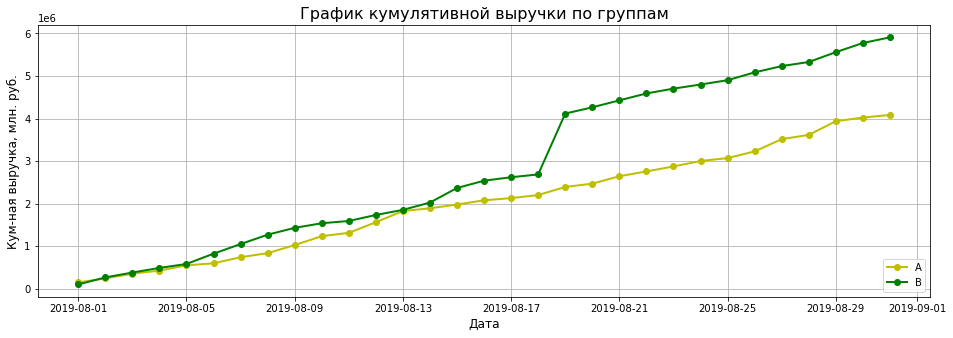

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(16,5))

# Строим график выручки группы А
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], 
         label='A', linewidth=2, marker='o', color='y')
# Строим график выручки группы B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], 
         label='B', linewidth=2, marker='o', color='g')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кум-ная выручка, млн. руб.', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.title('График кумулятивной выручки по группам', fontsize=16)
plt.show()

Посмотрим даты скачка показателей группы `B` более предметно:

In [27]:
cumulative_revenueB.query('date > "2019-08-17" and date < "2019-08-21"')

,date,revenue,orders
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423


*Как мы видим из динамики графика и таблицы выше, группа `B` за 1 день (19.08.2019 г.) стремительно набрала объем кумулятивной выручки. Это говорит об аномально крупных заказах - выбросах, которые значительно влияют на корректность результата теста.  
При заключительном анализе их требуется удалить.*

### 2.2. Построение графика кумулятивного среднего чека по группам

Для этого разделим кумулятивную выручку на кумулятивное число заказов:

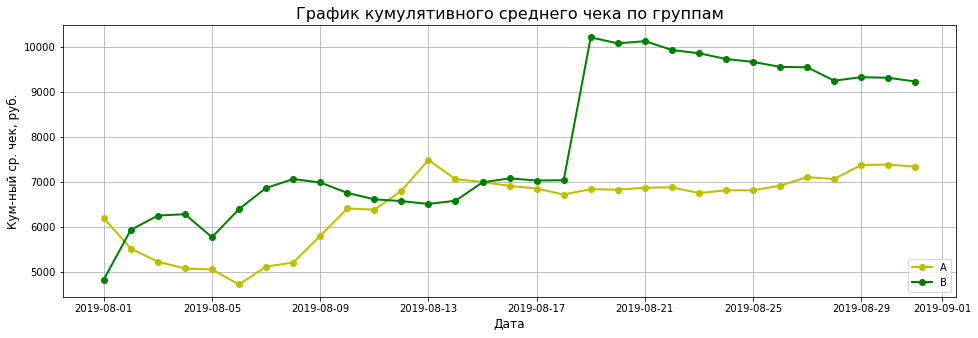

In [28]:
plt.figure(figsize=(16,5))

plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'],
         label='A', linewidth=2, marker='o', color='y')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'],
         label='B', linewidth=2, marker='o', color='g')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кум-ный ср. чек, руб.', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.title('График кумулятивного среднего чека по группам', fontsize=16)
plt.show()

*Кумулятивный средний чек в группе `B` также в след за выручкой резко вырос (примерно на 40%), достигнув своего пика. Обнаружен скачок и в группе `А` - перед 13.08.2019 числом, далее произошел спад.  
По итогу месяца показатели стабилизировались в обеих группах, однако делать окончательные выводы, не очистив данные в группе `В`, пока рано.*

### 2.3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Соберем данные в одном датафрейме:

In [29]:
merged_сumulative_revenue = cumulative_revenueA.merge(
    cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
merged_сumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим график относительного изменения кумулятивного среднего чека группы `B` к группе `A`:

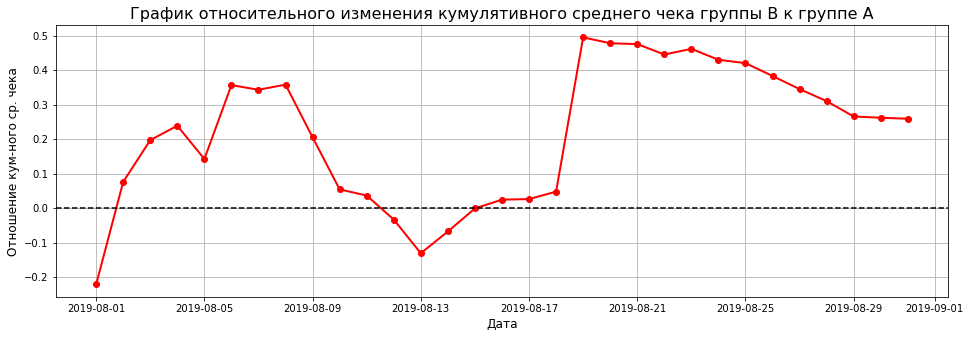

In [30]:
plt.figure(figsize=(16,5))

# cтроим отношение средних чеков
plt.plot(merged_сumulative_revenue['date'],
         (merged_сumulative_revenue['revenueB']/merged_сumulative_revenue['ordersB'])/
         (merged_сumulative_revenue['revenueA']/merged_сumulative_revenue['ordersA'])-1,
         linewidth=2, marker='o', color='r')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение кум-ного ср. чека', fontsize=12)
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.show()

*На данном графике отображено уже несколько резких рывков и падений, что также говорить в пользу наличия выбросов.
Без их отбора из данных результат будет искажен.*

### 2.4. Построение графика кумулятивной конверсии по группам

Произведем подсчет кумулятивной конверсии по группам и визуализируем данные:

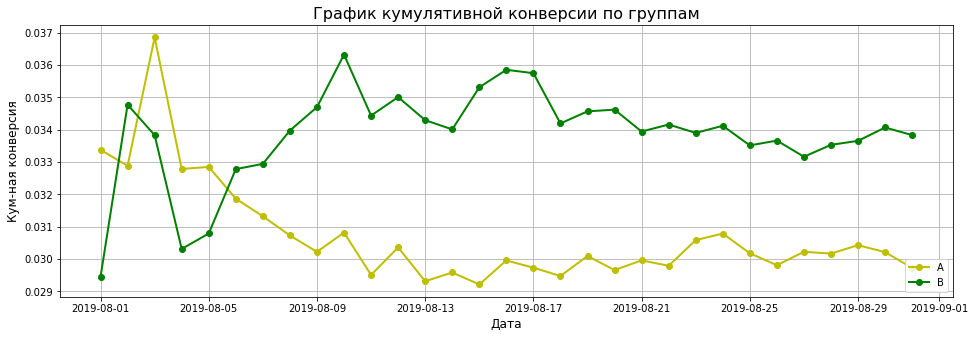

In [31]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(16,5))

plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], 
         label='A', linewidth=2, marker='o', color='y')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'],
         label='B', linewidth=2, marker='o', color='g')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кум-ная конверсия', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.title('График кумулятивной конверсии по группам', fontsize=16)
plt.show()

*Группы в первые дни сильно колебались, но после 05.08.2019 г. кумулятивная конверсия группы `В` вырвалась вперёд и зафиксировалась на уровнях 3.4-3.6%, а конверсия группы `А` просела и также стабилизировалась только на уровне 3%.*

### 2.5. Построение графика относительного изменения кумулятивной конверсии группы B к группе A

По аналогии соберем данные вместе:

In [32]:
merged_cumulative_conversions = cumulative_dataA[['date','conversion']].merge(
    cumulative_dataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


И отобразим все на графике:

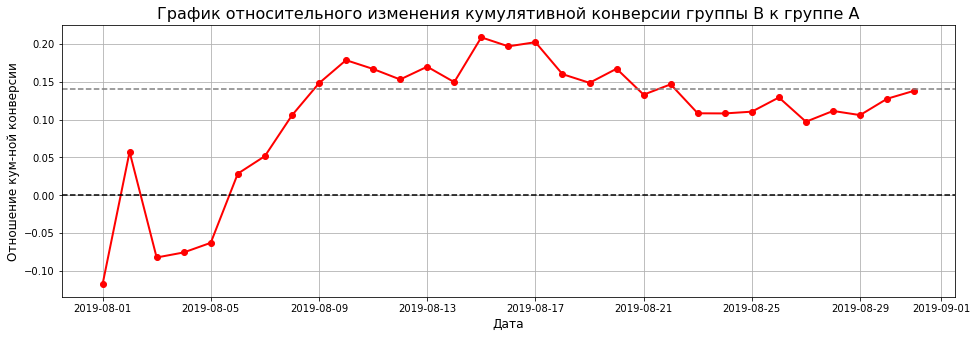

In [33]:
plt.figure(figsize=(16,5))

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1,
         linewidth=2, marker='o', color='r')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение кум-ной конверсии', fontsize=12)
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=16)
plt.show()

*Кумулятивная конверсия группы `В` не всегда была лучше. Только, начиная после 05.08.2019 г., набрала высоту и по итогу колебалась в районе 14% прироста к группе `A`.*  
*В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.*

### 2.6. Построение точечного графика количества заказов по пользователям

Подсчитаем количество заказов по пользователям:

In [34]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']

print('Среднее количество заказов на одного пользователя:', round(orders_by_users['orders'].mean(), 2))

Среднее количество заказов на одного пользователя: 1.16


Выведем ТОП-10 самых активных пользователей:

In [35]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


*Пользователи `4256040402` и `2458001652` совершили по 11 заказов, что, в свою очередь, в 10 раз выше среднего. Очевидно, что они явные претенденты на попадание в срез по аномальным значениям.*

Теперь построим сам график:

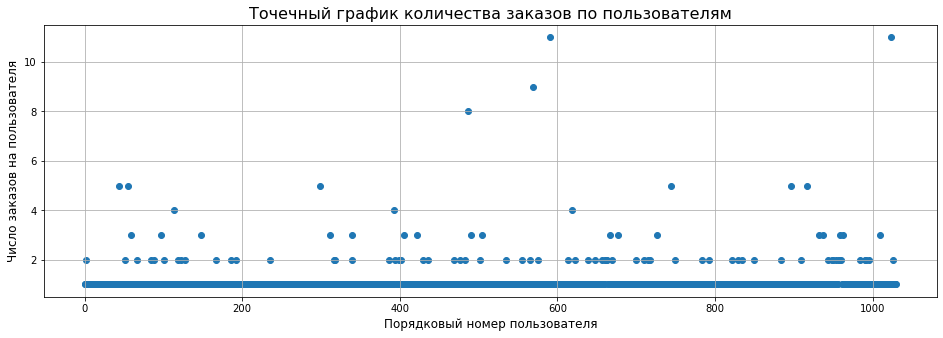

In [36]:
# серия из чисел от 0 до количества наблюдений
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(16,5))

plt.scatter(x_values, orders_by_users['orders'])

plt.xlabel('Порядковый номер пользователя', fontsize=12)
plt.ylabel('Число заказов на пользователя', fontsize=12)
plt.grid()
plt.title('Точечный график количества заказов по пользователям', fontsize=16)
plt.show()

*Как видно по показаниям графика, большинство пользователей совершило только по 1 заказу в августе 2019 г.  
Пользователей, заказавших более двух раз, мало.*

### 2.7. Подсчет 95-го и 99-го перцентиля количества заказов на пользователя

In [37]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

*Не более 5% пользователей совершили заказы более двух раз. И не более 1% - свыше 4 раз.  
За аномальных пользователей примем тех, кто купил более 2 товаров в течение отчетного месяца.*

### 2.8. Построение точечного графика стоимостей заказов

Узнаем среднюю сумму одного заказа:

In [38]:
print('Средняя сумма одного заказа:', round(orders['revenue'].mean()))

Средняя сумма одного заказа: 8348


А также сформируем ТОП-10 самых крупных заказов:

In [39]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


*Пользователь `1920142716` приобрел 19.08.2019 г. товар на 1 млн. 294 тыс. руб., хотя средняя сумма заказа за август 2019 г. всего 8348 руб. - это явный выброс. Интересно, что же он заказал?*

Визуализируем нашу таблицу:

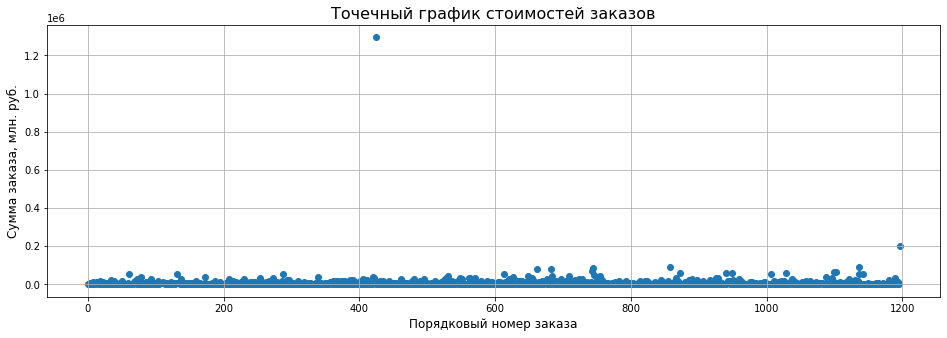

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(16,5))

plt.scatter(x_values, orders['revenue'])

plt.xlabel('Порядковый номер заказа', fontsize=12)
plt.ylabel('Сумма заказа, млн. руб.', fontsize=12)
plt.grid()
plt.title('Точечный график стоимостей заказов', fontsize=16)
plt.show()

*На основании графика и таблицы ТОП-10 выше можно сделать вывод, что большинство заказов не превышает 100 тыс. руб. А если посмотреть на среднюю сумма заказа, то понятно, что сумма каждого заказа в среднем составляет не более и 10 тыс. руб.*

Очистим данные и сформируем этот же график снова:

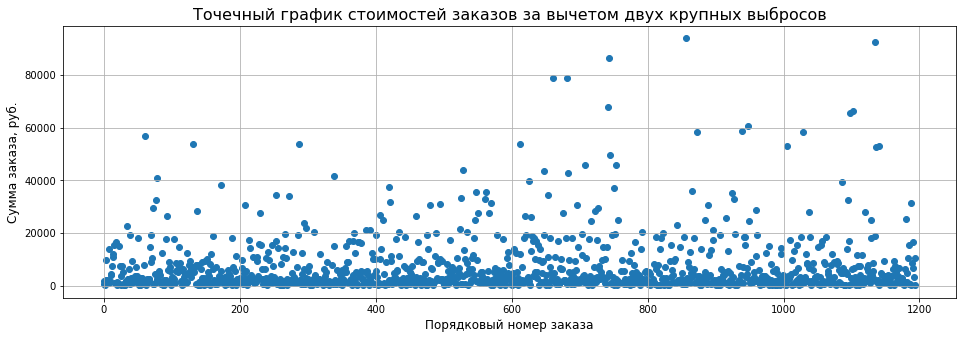

In [41]:
# уберем два аномально высоких значения
x2_values = pd.Series(range(0, len(orders[~orders['revenue'].isin([1294500, 202740])]['revenue'])))

plt.figure(figsize=(16,5))

plt.scatter(x2_values, orders[~orders['revenue'].isin([1294500, 202740])]['revenue'])

plt.xlabel('Порядковый номер заказа', fontsize=12)
plt.ylabel('Сумма заказа, руб.', fontsize=12)
plt.grid()
plt.title('Точечный график стоимостей заказов за вычетом двух крупных выбросов', fontsize=16)
plt.show()

*Да, так намного лучше.*

### 2.9. Подсчет 95-го и 99-го перцентиля стоимости заказов

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

*В отчетном периоде с суммой покупки свыше 28 тыс. руб. всего не более 5% заказов. И 1% заказов, в которых сумма превышает 58 тыс. руб.*  
*За аномальные заказы возьмем все, что превышают сумму в 28 тыс. руб.*

### 2.10. Подсчет статистической значимости различий в конверсии (среднем количестве заказов на покупателя) между группами по "сырым" данным

`Нулевая гипотеза (H₀)`: Cтатистической значимости различий в конверсии между группами по "сырым" данным нет.  
`Альтернативная гипотеза (H₁)`: Различия в конверсии между группами по "сырым" данным есть.

Создадим таблицы по группам для пользователей, совершивших хотя бы 1 заказ, - будет указано число заказов:

In [43]:
orders_by_usersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_usersA.columns = ['visitor_id', 'orders']

orders_by_usersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_usersB.columns = ['visitor_id', 'orders']

Объявим переменные, в которых пользователям будет соответствовать их число заказов:

In [44]:
sampleA = pd.concat(
    [orders_by_usersA['orders'],
     pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_by_usersA['orders'])),
               name='orders')]
    ,axis=0)

sampleB = pd.concat(
    [orders_by_usersB['orders'],
     pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(orders_by_usersB['orders'])),
               name='orders')]
    ,axis=0)

Применим тест `Манна-Уитни` и выведем `p-value` для сравнения конверсий (ср. числа заказов на пользователя) между группами:

In [45]:
print('p-value: {0:.4f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

alpha = .05 # установим критический уровень статистической значимости 

if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными')

p-value: 0.0168
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


А также выведем относительное различие в конверсии (ср. числе заказов на пользователя) между группами:

In [46]:
print('Относительное различие в конверсии: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

Относительное различие в конверсии: 0.138


*По "сырым" данным можно говорить о `статистической значимости различий конверсий между группами` (`p-value = 1.68%`, что меньше alpha), а также об `относительной разнице` между группами в пользу большей конверсии у группы `B`. Нулевая гипотеза H₀ отвергнута в пользу альтернативной H₁.*

### 2.11. Подсчет статистической значимости различий в среднем чеке заказа между группами по "сырым" данным

`Нулевая гипотеза (H₀)`: Статистической значимости различий в среднем чеке заказа между группами по "сырым" данным нет.  
`Альтернативная гипотеза (H₁)`: Различия в среднем чеке заказа между группами по "сырым" данным есть.

Начнем с теста `Манна-Уитни`:

In [47]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'])[1]

print('p-value: {0:.3f}'.format(p_value))

alpha = .05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между ср. чеками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать ср. чеки разными')

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать ср. чеки разными


Не забудем отобразить и относительное различие в среднем чеке заказа между группами:

In [48]:
print('Относительное различие в среднем чеке: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

Относительное различие в среднем чеке: 0.259


*Значение `p-value = 72.9%`, что свидетельствует об `отсутствии статистической значимости различий среднего чека заказа между группами` согласно гипотезе H₀ и об `относительной разнице` между группами в пользу большей суммы среднего чека заказа у группы `B`. Однако это все результаты по "сырым" данным, посмотрим, что будет по "очищенным" данным.*

### 2.12. Подсчет статистической значимости различий в конверсии (среднем количестве заказов на покупателя) между группами по "очищенным" данным

`Нулевая гипотеза (H₀)`: Статистической значимости различий в конверсии между группами по "очищенным" данным нет.  
`Альтернативная гипотеза (H₁)`: Различия в конверсии между группами по "очищенным" данным есть.

Cделаем срезы по аномальному количеству заказов на одного пользователя и аномальной стоимости одного заказа (более 2-х покупок на пользователя и свыше 28 тыс. руб. соответственно, порог = 5%):

In [49]:
users_with_many_orders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA['orders'] > 2]['visitor_id'],
        orders_by_usersB[orders_by_usersB['orders'] > 2]['visitor_id'],
    ],
    axis=0)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormal_users.shape[0])

Количество аномальных пользователей: 74


Уберем этих пользователей из калькуляции:

In [50]:
sample_Afiltered = pd.concat(
    [
        orders_by_usersA[
            np.logical_not(orders_by_usersA['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "A"')['visitors'].sum() - len(orders_by_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0)

sample_Bfiltered = pd.concat(
    [
        orders_by_usersB[
            np.logical_not(orders_by_usersB['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "B"')['visitors'].sum() - len(orders_by_usersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0)

Проведем знакомый нам тест:

In [51]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_Afiltered, sample_Bfiltered)[1]))

alpha = .05

if stats.mannwhitneyu(sample_Afiltered, sample_Bfiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными')

p-value: 0.013
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


И подсчитаем относительное различие конверсий двух групп:

In [52]:
print('Относительное различие в конверсии: {0:.3f}'.format(sample_Bfiltered.mean()/sample_Afiltered.mean() - 1))

Относительное различие в конверсии: 0.173


*Как и в случае с "сырыми" данными, `статистическая значимость достигнута`, `возросла относительная разница` группы `B` над `A`. В результате нулевая гипотеза H₀ отвергнута в пользу альтернативной H₁.*

### 2.13. Подсчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным

`Нулевая гипотеза (H₀)`: Статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным нет.  
`Альтернативная гипотеза (H₁)`: Различия в среднем чеке заказа между группами по "очищенным" данным есть.

Проведем тест:

In [53]:
p_value_filtered = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]

print('p-value: {0:.3f}'.format(p_value_filtered))

alpha = .05

if p_value_filtered < alpha:
    print('Отвергаем нулевую гипотезу: между ср. чеками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать ср. чеки разными')

p-value: 0.738
Не получилось отвергнуть нулевую гипотезу, нет оснований считать ср. чеки разными


Посмотрим на относительное различие средних чеков:

In [54]:
ratio_filtered = (orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1)

print('Относительное различие в среднем чеке: {0:.3f}'.format(ratio_filtered))

Относительное различие в среднем чеке: -0.020


*`Статистическая значимость вновь не достигнута`, нулевая гипотеза H₀ не отвергнута.   
`P-value почти не изменился`, однако `разница между сегментами упала` с 25,9% до -2%. Это говорит о том, что после удаления выбросов в данных значительно меньше шума.*

### 2.14. Принятие решения по результатам теста

**Имеющиеся факты:**
- Статистически значимое различие в конверсии между группами есть как по "сырым", так и по "очищенным" данным (нулевые гипотезы отвергнуты в пользу альтернативных);
- Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по данным после фильтрации аномалий (нулевые гипотезы не отвергнуты);
- График различия кумулятивного среднего чека колебался, что говорило нам об аномальных значениях, с положительной динамикой к группе `А`. Однако по результатам теста значения между группами примерно одинаковы;
- График различия кумулятивной конверсии между группами к концу отчетного периода показывает, что результаты группы `B` лучше группы `A` и находятся на уровне +14% с тенденцией к росту. По "очищенным" данным предварительно эта разница может возрасти до 17%.

**`Я предлагаю:`**
- Остановить тест и `зафиксировать победу группы B`;
- При возможности, в ближайшее время, `внедрить гипотезу "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"` с самым высоким показателем `RICE` для более эффективного темпа увеличения выручки нашего интернет-магазина и охвата большего количества пользователей.